<a href="https://colab.research.google.com/github/mariem34/your_first_code/blob/master/UnSupervised__HCV_MariemKh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Préparation de l'environnement**

In [2]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import naive_bayes
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import precision_score, confusion_matrix,roc_curve, precision_recall_curve, accuracy_score

# **2. Chargement des données**

In [4]:
data = pd.read_csv('/content/HCV-Egy-Data.csv')

In [5]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,7425,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,4178,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,3661,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11,1


# **3.Réconciliation des données (Data Wrangling)**

# **3.1.Exploration des données**

In [6]:
data.shape #(nombre de lignes, nombre de colonnes)

(1385, 29)

In [7]:
data.columns

Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

In [8]:
data.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1385.00000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,7533.386282,4.422130e+06,12.587726,158348.06065,82.774729,83.916245,83.405776,83.510469,83.709025,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,2668.220333,3.463577e+05,1.713511,38794.78555,25.993242,25.922800,26.529730,26.064478,26.205994,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2991.000000,3.816422e+06,10.000000,93013.00000,39.000000,39.000000,39.000000,39.000000,39.000000,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5219.000000,4.121374e+06,11.000000,124479.00000,60.000000,62.000000,61.000000,60.000000,61.000000,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,7498.000000,4.438465e+06,13.000000,157916.00000,83.000000,83.000000,82.000000,84.000000,83.000000,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9902.000000,4.721279e+06,14.000000,190314.00000,105.000000,106.000000,107.000000,106.000000,107.000000,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,12101.000000,5.018451e+06,15.000000,226464.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


# **3.2.Renommer quelques attributs et la classe**

In [9]:
data.rename(columns={'Baselinehistological staging':'Classe'}, inplace=True)
data.rename(columns={'Age ':'Age'}, inplace=True)
data.rename(columns={'Epigastric pain ':'Epigastric pain'}, inplace=True)

# **3.3.Vérification de la distribution des différentes valeurs de la classe**

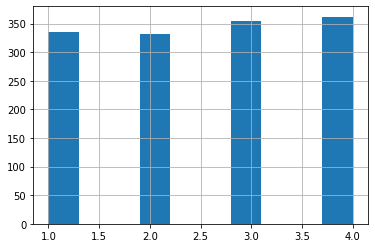

In [10]:
data.Classe.hist()

# **3.4. Des valeurs nulles à s’en débarrasser ou remplir?**

In [11]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1385 non-null   int64  
 1   Gender                            1385 non-null   int64  
 2   BMI                               1385 non-null   int64  
 3   Fever                             1385 non-null   int64  
 4   Nausea/Vomting                    1385 non-null   int64  
 5   Headache                          1385 non-null   int64  
 6   Diarrhea                          1385 non-null   int64  
 7   Fatigue & generalized bone ache   1385 non-null   int64  
 8   Jaundice                          1385 non-null   int64  
 9   Epigastric pain                   1385 non-null   int64  
 10  WBC                               1385 non-null   int64  
 11  RBC                               1385 non-null   float64
 12  HGB   

In [12]:
data.isnull().sum() # which "is null"?

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

In [13]:
data.isna().sum().sum()  #which "is Na values" ,detect missing values

0

# **3.5. Observer les corrélations**

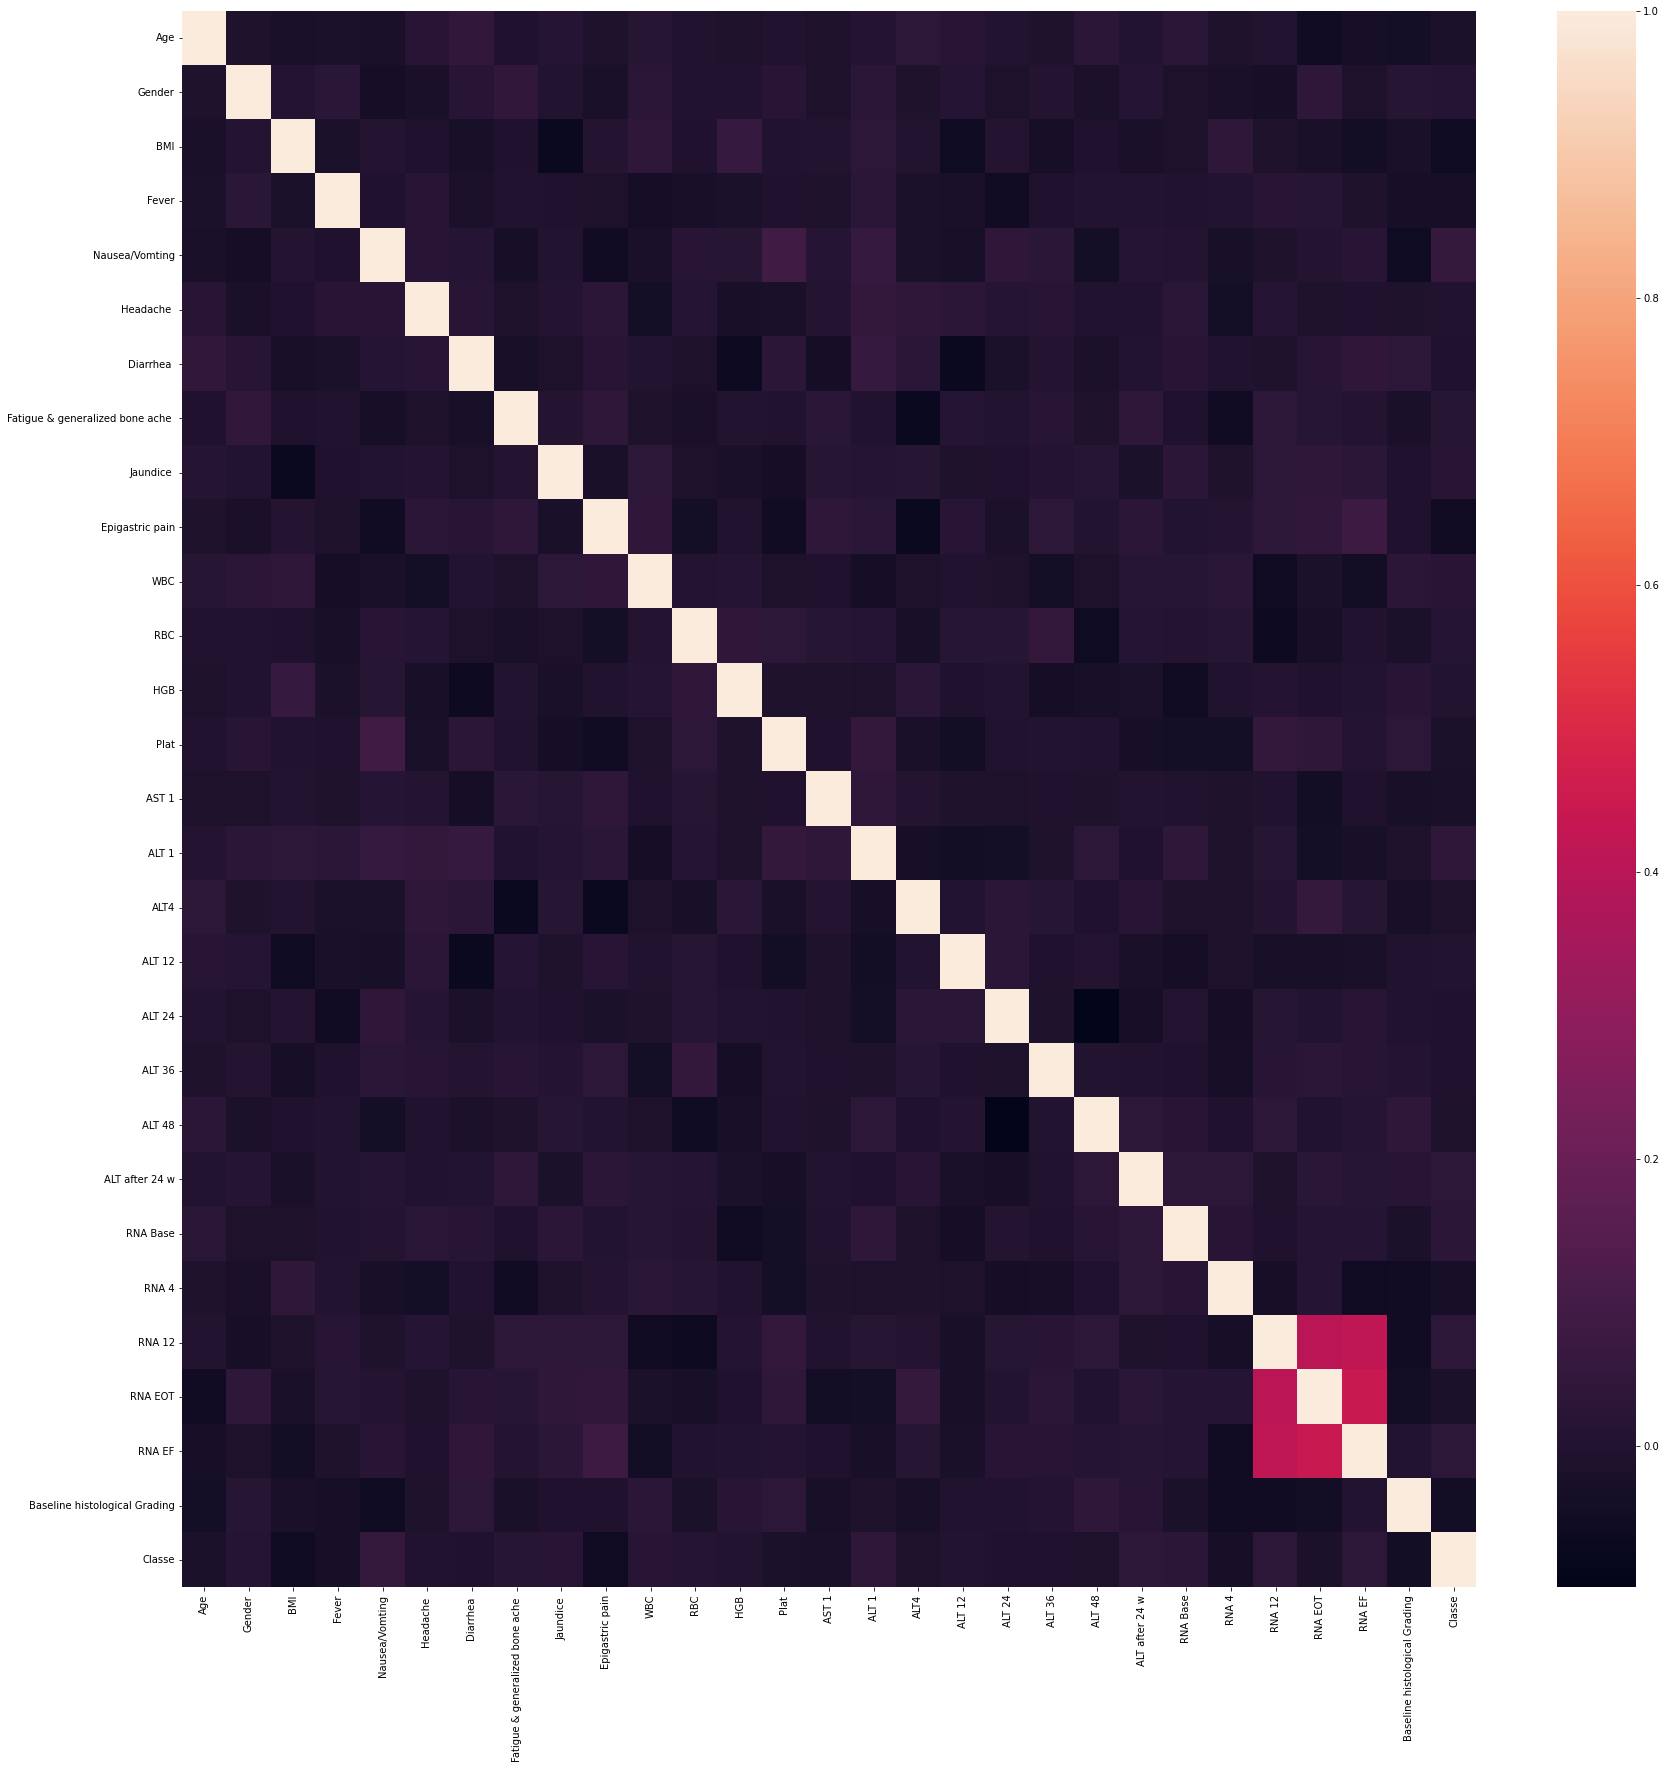

In [14]:
plt.figure( figsize = (29,29))
sns.heatmap(data.corr()) 

In [15]:
print(data.corr()) #en chiffres c'est plus lisible

                                       Age  ...    Classe
Age                               1.000000  ... -0.019599
Gender                           -0.009934  ...  0.011955
BMI                              -0.025353  ... -0.057259
Fever                            -0.021208  ... -0.030975
Nausea/Vomting                   -0.025024  ...  0.054906
Headache                          0.017562  ... -0.001996
Diarrhea                          0.043574  ... -0.005639
Fatigue & generalized bone ache  -0.007817  ...  0.014563
Jaundice                          0.010285  ...  0.020219
Epigastric pain                  -0.010817  ... -0.052110
WBC                               0.014310  ...  0.017945
RBC                              -0.002162  ...  0.009623
HGB                              -0.012810  ...  0.002752
Plat                             -0.002225  ... -0.017284
AST 1                            -0.016633  ... -0.025126
ALT 1                             0.005723  ...  0.036867
ALT4          

In [16]:
data.drop(['ALT 12'], axis=1, inplace=True)

# **3.6.Transformation des données**

**Changement du type des attributs qualitatives**

In [17]:
colonnes =['Gender','Fever','Nausea/Vomting','Headache ','Diarrhea ','Fatigue & generalized bone ache ', 'Jaundice ','Epigastric pain', 'Classe']
data[colonnes]= data[colonnes].astype('category')

**Discrétisation des attributs quantitatifs**



**> Par la méthode qcut()**



In [18]:
data["AgeQ"]=pd.qcut(data.Age,7,labels=["1","2","3","4","5","6","7"])
data["AgeQ"].describe()

count     1385
unique       7
top          3
freq       221
Name: AgeQ, dtype: object

In [19]:
data["BMIQ"]=pd.qcut(data.BMI,5,labels=["1","2","3","4","5"])
data["BMIQ"].describe()

count     1385
unique       5
top          1
freq       305
Name: BMIQ, dtype: object

In [20]:
data["WBCQ"]=pd.qcut(data.WBC,3,labels=["1","2","3"])
data["WBCQ"].describe()

count     1385
unique       3
top          3
freq       462
Name: WBCQ, dtype: object

In [21]:
data["RBCQ"]=pd.qcut(data.RBC,3,labels=["1","2","3"])
data["RBCQ"].describe()

count     1385
unique       3
top          3
freq       462
Name: RBCQ, dtype: object

In [22]:
for i in data["Gender"]:
  if i==1:
    data["HGBQ"]=pd.qcut(data.HGB,3,labels=["1","2","3"])
  else:
    data["HGBQ"]=pd.qcut(data.HGB,3,labels=["1","2","3"])
data["HGBQ"].describe()

count     1385
unique       3
top          1
freq       671
Name: HGBQ, dtype: object

In [23]:
data["PlatQ"]=pd.qcut(data.Plat,3,labels=["1","2","3"])
data["PlatQ"].describe()

count     1385
unique       3
top          3
freq       462
Name: PlatQ, dtype: object



> P**ar la définition d'une fonctio**n



In [24]:
def reClassALT(ratio):
    if (ratio < 20): return 1
    else:
        if (ratio < 40): return 2
        else:
            return 3
data['AST 1'] = data['AST 1'].apply(reClassALT)
data['ALT 1'] = data['ALT 1'].apply(reClassALT)
data['ALT4'] = data['ALT4'].apply(reClassALT)
data['ALT 24'] = data['ALT 24'].apply(reClassALT)
data['ALT 36'] = data['ALT 36'].apply(reClassALT)
data['ALT 48'] = data['ALT 48'].apply(reClassALT)
data['ALT after 24 w'] = data['ALT after 24 w'].apply(reClassALT)

In [25]:
data.columns #pour avoir les attributs sous les yeux pour l'écriture du code

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w', 'RNA Base',
       'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF', 'Baseline histological Grading',
       'Classe', 'AgeQ', 'BMIQ', 'WBCQ', 'RBCQ', 'HGBQ', 'PlatQ'],
      dtype='object')

In [26]:
def DisretRNA(ratio):
  if (ratio <= 5): return 1
  else:
    return 2
 
data['RNA Base'] = data['RNA Base'].apply(DisretRNA)
data['RNA 4'] = data['RNA 4'].apply(DisretRNA)
data['RNA 12'] = data['RNA 12'].apply(DisretRNA)
data['RNA EOT'] = data['RNA EOT'].apply(DisretRNA)
data['RNA EF'] = data['RNA EF'].apply(DisretRNA)

In [27]:
data.shape

(1385, 34)

In [28]:

data.drop(['Age'], axis=1, inplace=True)
data.drop(['BMI'], axis=1, inplace=True)
data.drop(['WBC'], axis=1, inplace=True)
data.drop(['RBC'], axis=1, inplace=True)
data.drop(['Plat'], axis=1, inplace=True)
data.drop(['HGB'], axis=1, inplace=True)

In [29]:
data.shape

(1385, 28)

# **ESSAI K MODE**

In [30]:
data.columns

Index(['Gender', 'Fever', 'Nausea/Vomting', 'Headache ', 'Diarrhea ',
       'Fatigue & generalized bone ache ', 'Jaundice ', 'Epigastric pain',
       'AST 1', 'ALT 1', 'ALT4', 'ALT 24', 'ALT 36', 'ALT 48',
       'ALT after 24 w', 'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Classe', 'AgeQ', 'BMIQ', 'WBCQ',
       'RBCQ', 'HGBQ', 'PlatQ'],
      dtype='object')

In [31]:
XK=data[['Gender', 'Fever', 'Nausea/Vomting', 'Headache ', 'Diarrhea ',
       'Fatigue & generalized bone ache ', 'Jaundice ', 'Epigastric pain',
       'AST 1', 'ALT 1', 'ALT4', 'ALT 24', 'ALT 36', 'ALT 48',
       'ALT after 24 w', 'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Classe', 'AgeQ', 'BMIQ', 'WBCQ',
       'RBCQ', 'HGBQ', 'PlatQ']]


In [32]:
XK.head()

,Gender,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,AST 1,ALT 1,ALT4,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Classe,AgeQ,BMIQ,WBCQ,RBCQ,HGBQ,PlatQ
0,1,2,1,1,1,2,2,2,3,3,3,3,1,1,1,2,2,2,1,1,13,2,6,5,2,2,2,1
1,1,1,2,2,1,2,2,1,3,3,3,3,3,3,3,2,2,2,2,2,4,2,4,3,3,2,1,1
2,1,2,2,2,2,1,1,1,3,3,3,3,1,1,1,2,2,1,2,2,4,4,6,4,1,2,1,2
3,2,1,2,1,2,1,2,1,3,3,3,3,3,3,2,2,2,2,2,2,10,3,4,4,2,3,1,2
4,1,1,1,2,1,2,2,2,3,3,3,3,3,3,2,2,2,2,2,2,11,1,7,4,1,2,1,3


In [33]:
XK_copy = XK.copy() #Création d'une copie qui nous servira par la suite 

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
XK = XK.apply(le.fit_transform)
XK.head()

,Gender,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,AST 1,ALT 1,ALT4,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Classe,AgeQ,BMIQ,WBCQ,RBCQ,HGBQ,PlatQ
0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,10,1,5,4,1,1,1,0
1,0,0,1,1,0,1,1,0,1,1,1,1,2,2,2,0,1,1,1,1,1,1,3,2,2,1,0,0
2,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,1,0,1,1,1,3,5,3,0,1,0,1
3,1,0,1,0,1,0,1,0,1,1,1,1,2,2,1,0,1,1,1,1,7,2,3,3,1,2,0,1
4,0,0,0,1,0,1,1,1,1,1,1,1,2,2,1,0,1,1,1,1,8,0,6,3,0,1,0,2


In [35]:
#from kmodes.kmodes import KModes 
#suite à la génération d'erreur, j'ai installé ce module
!pip install kmodes
import kmodes


In [36]:
#Application de l'algorithme Kmode en spécifiant le nombre de clusters à 4 
from kmodes.kmodes import KModes
km_cao = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(XK)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 202, cost: 12097.0


--> affichage de nombre de changement de centre d'inertie
nombre d'itéaration

In [37]:
# Predicted Clusters
predicted_cluster=fitClusters_cao
predicted_cluster.shape

(1385,)

In [38]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = XK.columns

In [39]:
# Mode of the clusters
clusterCentroidsDf

,Gender,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,AST 1,ALT 1,ALT4,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Classe,AgeQ,BMIQ,WBCQ,RBCQ,HGBQ,PlatQ
0,0,1,1,0,1,0,1,1,1,1,1,1,2,2,1,0,1,1,1,1,12,3,0,2,0,0,0,1
1,1,0,1,1,0,1,0,0,1,1,1,1,2,2,1,0,1,0,0,0,12,1,6,0,1,2,0,2
2,1,0,0,0,0,1,1,0,1,1,1,1,2,2,1,0,1,1,1,1,9,2,2,3,2,1,0,0
3,1,1,0,1,0,0,0,1,1,1,1,1,2,2,1,0,1,1,1,1,11,0,3,4,1,2,2,0


# **Choosing K by comparing Cost against each K**

Choix du nombre de cluster qui répartit le mieux le jeu de données (on supposant qu'on ne connait pas que c'est 4)
Le paramètre de choix est le "cost" qui réellement tend à minmiser les itérations avant d'avoir une répartition stable
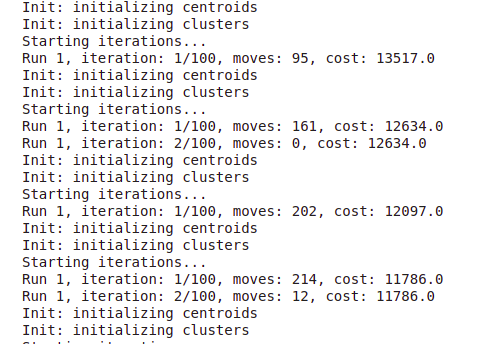

In [40]:
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(XK)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 15096.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 95, cost: 13517.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 161, cost: 12634.0
Run 1, iteration: 2/100, moves: 0, cost: 12634.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 202, cost: 12097.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 214, cost: 11786.0
Run 1, iteration: 2/100, moves: 12, cost: 11786.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 187, cost: 11594.0
Run 1, iteration: 2/100, moves: 23, cost: 11594.0
Init: initializing centroids
Init: initializing clusters
Starting it

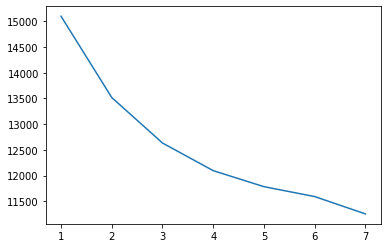

In [41]:
y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)

# **Combining the predicted clusters with the original DF**

In [42]:
XK = XK_copy.reset_index()

In [43]:
predicted_cluster = pd.DataFrame(fitClusters_cao)
predicted_cluster.columns = ['PCL']
combinedDf = pd.concat([XK, predicted_cluster], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

Définier "PCL" en tant que le nouveau Label prédit, nom du cluster, et les afficher en tant que colonne (pd. Data Frame..)

In [44]:
cluster_0 = combinedDf[combinedDf['PCL'] == 1]
cluster_1 = combinedDf[combinedDf['PCL'] == 2]
cluster_2 = combinedDf[combinedDf['PCL'] == 3]
cluster_3 = combinedDf[combinedDf['PCL'] == 4]

assigner chaque chiffre à un label, une classe.

In [45]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 5 to 1384
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Gender                            317 non-null    category
 1   Fever                             317 non-null    category
 2   Nausea/Vomting                    317 non-null    category
 3   Headache                          317 non-null    category
 4   Diarrhea                          317 non-null    category
 5   Fatigue & generalized bone ache   317 non-null    category
 6   Jaundice                          317 non-null    category
 7   Epigastric pain                   317 non-null    category
 8   AST 1                             317 non-null    int64   
 9   ALT 1                             317 non-null    int64   
 10  ALT4                              317 non-null    int64   
 11  ALT 24                            317 non-null    int64  

In [46]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 1375
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Gender                            315 non-null    category
 1   Fever                             315 non-null    category
 2   Nausea/Vomting                    315 non-null    category
 3   Headache                          315 non-null    category
 4   Diarrhea                          315 non-null    category
 5   Fatigue & generalized bone ache   315 non-null    category
 6   Jaundice                          315 non-null    category
 7   Epigastric pain                   315 non-null    category
 8   AST 1                             315 non-null    int64   
 9   ALT 1                             315 non-null    int64   
 10  ALT4                              315 non-null    int64   
 11  ALT 24                            315 non-null    int64  

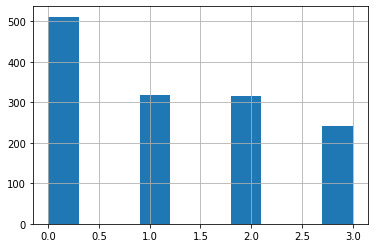

In [47]:
combinedDf.PCL.hist()

Quelques exemple pour visualiser la distribution  de chaque attribut selon les classes




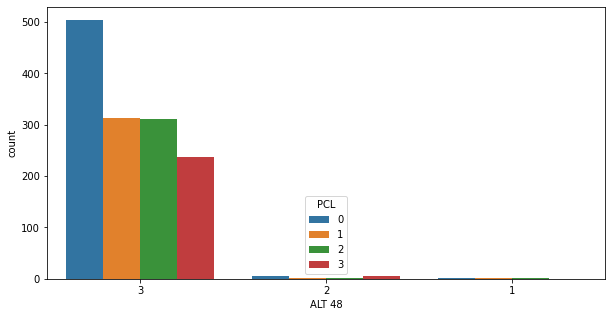

In [48]:
plt.subplots(figsize = (10,5))
sns.countplot(x=combinedDf['ALT 48'],order=combinedDf['ALT 48'].value_counts().index,hue=combinedDf['PCL'])
plt.show()

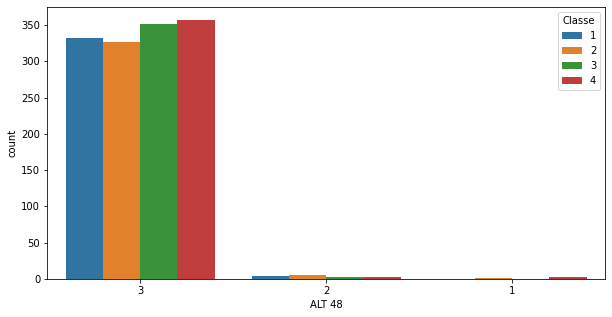

In [49]:
plt.subplots(figsize = (10,5))
sns.countplot(x=XK['ALT 48'],order=XK['ALT 48'].value_counts().index,hue=XK['Classe'])
plt.show()

In [50]:
combinedDf.head()

,Gender,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,AST 1,ALT 1,ALT4,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Classe,AgeQ,BMIQ,WBCQ,RBCQ,HGBQ,PlatQ,PCL
0,1,2,1,1,1,2,2,2,3,3,3,3,1,1,1,2,2,2,1,1,13,2,6,5,2,2,2,1,2
1,1,1,2,2,1,2,2,1,3,3,3,3,3,3,3,2,2,2,2,2,4,2,4,3,3,2,1,1,2
2,1,2,2,2,2,1,1,1,3,3,3,3,1,1,1,2,2,1,2,2,4,4,6,4,1,2,1,2,0
3,2,1,2,1,2,1,2,1,3,3,3,3,3,3,2,2,2,2,2,2,10,3,4,4,2,3,1,2,2
4,1,1,1,2,1,2,2,2,3,3,3,3,3,3,2,2,2,2,2,2,11,1,7,4,1,2,1,3,2
